# AI/ML with Python: Web Scraping & Sentiment Analysis


## Analyzing Heart Health with Sentiment Analysis on Medical Data


In the realm of healthcare, leveraging AI and machine learning to analyze medical data has become increasingly crucial for gaining insights into patient well-being. The "heart.csv" dataset provides a comprehensive set of attributes related to heart health, including patient age, gender, chest pain type, blood pressure, cholesterol levels, and more.

Understanding patient sentiment and experiences related to heart health can be valuable for healthcare professionals and researchers. Sentiment analysis on this dataset can unveil hidden patterns and potential correlations between patient attributes and their reported sentiments.

Our journey begins by importing essential Python libraries and loading the "heart.csv" dataset. As we explore this dataset, we aim to uncover the emotional aspects and sentiments expressed by patients. This sentiment analysis can provide a deeper understanding of the subjective experiences related to heart health.

**This dataset contains information about patients with heart disease. It includes information such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar levels, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak (ST depression induced by exercise relative to rest), slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thalassemia (a type of blood disorder), and the presence or absence of heart disease.**

### Import Libraries

In [12]:
#import necessary libraries

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Data Acquisition

In this section, the code uses the Pandas library to load the "heart.csv" dataset into a DataFrame named heart_data. This dataset contains various columns related to heart health, including patient age, gender, chest pain type, blood pressure, cholesterol levels, and more.

In [57]:
# Load the "heart.csv" dataset into a DataFrame named 'df'
df = pd.read_csv("heart.csv")

# Display the first few rows of the dataset to get an overview
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Display concise information about the DataFrame using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

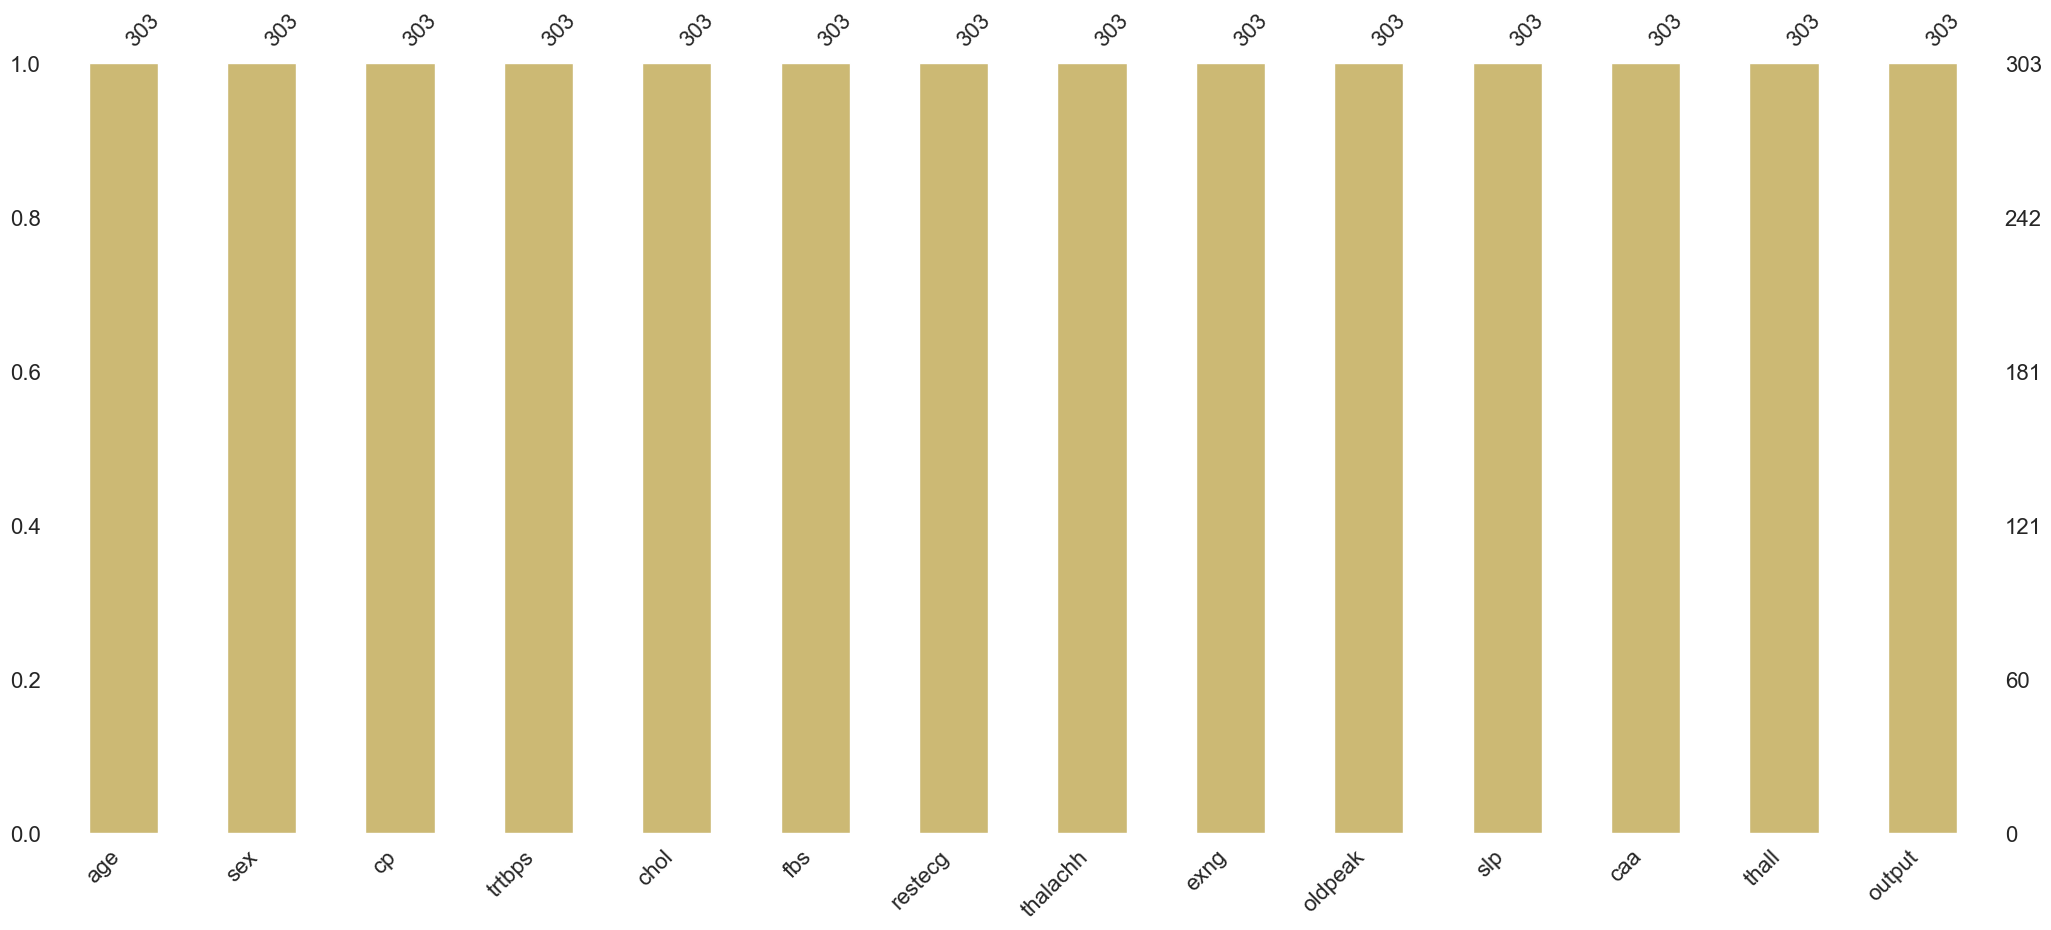

In [61]:
# Visualize missing values using a bar chart from the missingno library
msno.bar(df, color='y')

In [62]:
# Remove duplicate rows from the DataFrame and modify it in-place
df.drop_duplicates(inplace=True)

In [63]:
# Display a summary of the dataset's numerical columns using the describe method
print(f"Summary Of The Dataset with numerical columns :")

# Apply styling to the summary table for better visualization
df.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.420530,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.047970,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Count the number of distinct values in the column
    num_distinct_values = len(df[column].unique())
    
    # Print the column name and the count of distinct values
    print(f"{column}: {num_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [65]:
# Define a list of specified columns
specified_columns = ['age', 'sex', 'cp', 'fbs', 'restecg', 'exng','slp', 'caa', 'thall', 'output']

# Iterate through each specified column
for col in specified_columns:
    # Count the total number of unique values in the column
    total_unique_values = df[col].nunique()
    
    # Print the total unique values for the current column
    print(f'Total unique values for {col}: {total_unique_values}')

    # Get the count of each unique value in the column
    top_values = df[col].value_counts()

    # Define colors for printing
    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    # Iterate through each unique value and its count
    for i, (value, count) in enumerate(top_values.items()):
        # Choose a color for printing
        color = colors[i % len(colors)]
        
        # Print the unique value and its count with colored text
        print(f'{color}{value}: {count}{Fore.RESET}')

    # Print a separator line after printing each specified column
    print('\n' + '=' * 30 + '\n')

Total unique values for age: 41
58: 19
57: 17
54: 16
59: 14
52: 13
51: 12
62: 11
56: 11
44: 11
60: 11
41: 10
64: 10
67: 9
63: 9
43: 8
55: 8
42: 8
61: 8
65: 8
53: 8
45: 8
50: 7
48: 7
46: 7
66: 7
47: 5
49: 5
70: 4
39: 4
68: 4
35: 4
71: 3
40: 3
69: 3
34: 2
37: 2
38: 2
29: 1
74: 1
76: 1
77: 1


Total unique values for sex: 2
1: 206
0: 96


Total unique values for cp: 4
0: 143
2: 86
1: 50
3: 23


Total unique values for fbs: 2
0: 257
1: 45


Total unique values for restecg: 3
1: 151
0: 147
2: 4


Total unique values for exng: 2
0: 203
1: 99


Total unique values for slp: 3
2: 141
1: 140
0: 21


Total unique values for caa: 5
0: 175
1: 65
2: 38
3: 20
4: 4


Total unique values for thall: 4
2: 165
3: 117
1: 18
0: 2


Total unique values for output: 2
1: 164
0: 138




### Data Exploration

In [66]:
# Select numerical columns in the DataFrame
df_numericals = df.select_dtypes(['int64', 'float64'])

# Get a list of numerical column names
numericals = [i for i in df_numericals.columns]

# Print the list of numerical column names
print('numericals: ', numericals)

numericals:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


**Visualization**

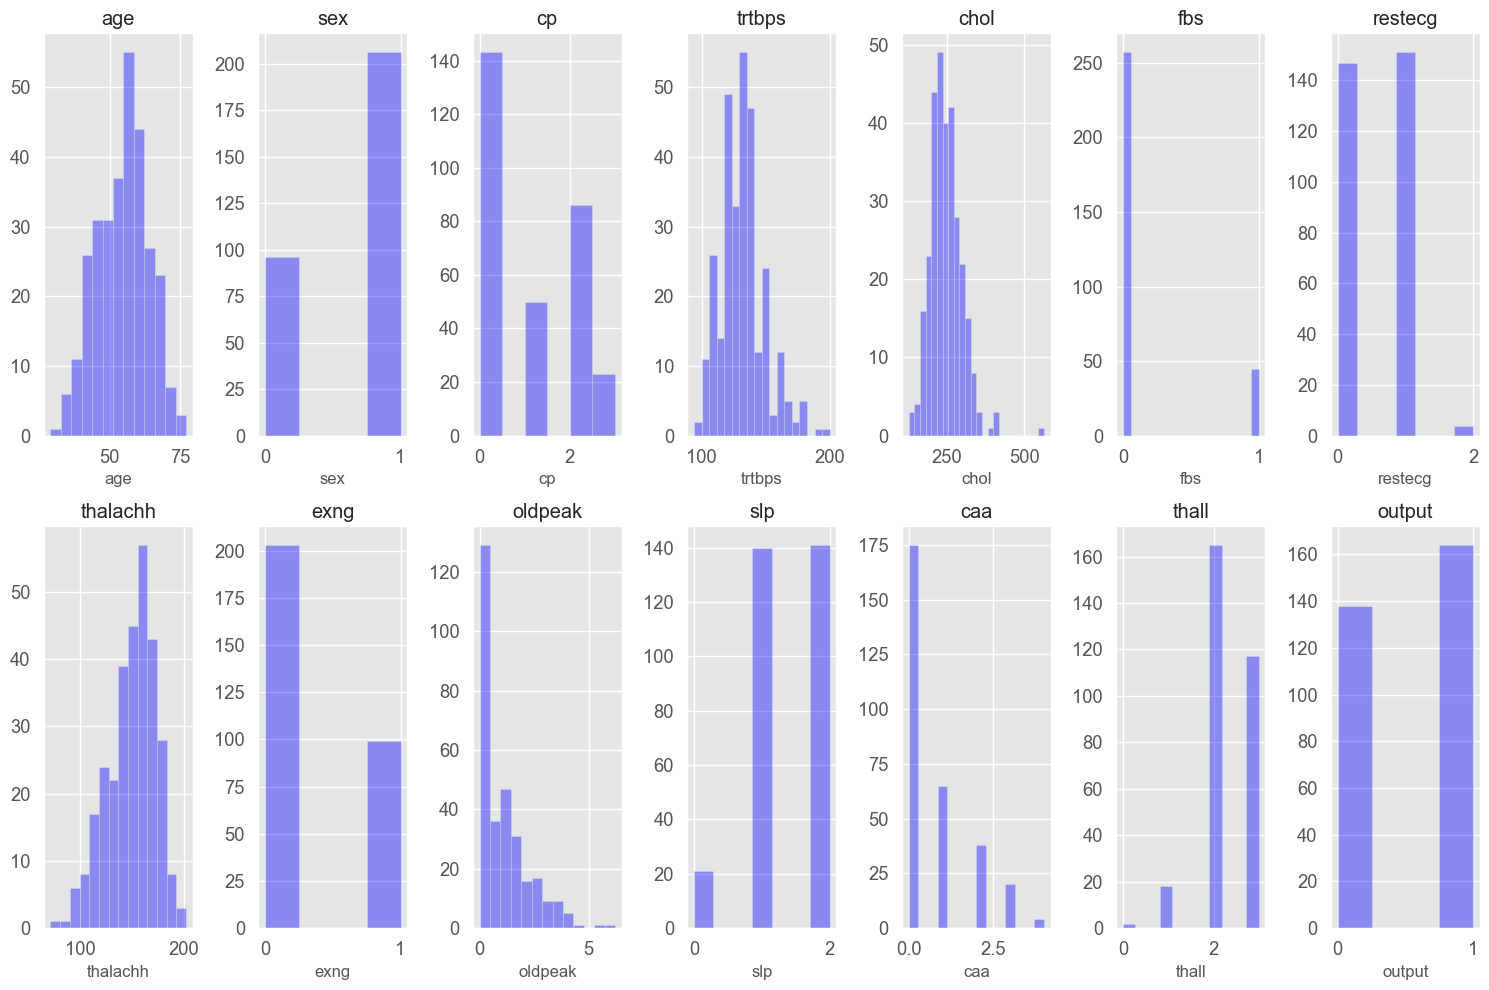

In [67]:
# Set the plot style to 'ggplot'
plt.style.use('ggplot')

# Get numerical column names
numeric_columns = df_numericals.columns

# Create a new figure with a specific size
plt.figure(figsize=(15, 10))

# Iterate through each numerical variable
for i, variable in enumerate(numeric_columns):
    # Create subplots in a 2x7 grid
    plt.subplot(2, 7, i + 1)
    
    # Plot a distribution plot for each numerical variable
    sns.distplot(df_numericals[variable], kde=False, color='blue')
    
    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Set the title of the subplot as the variable name
    plt.title(variable)

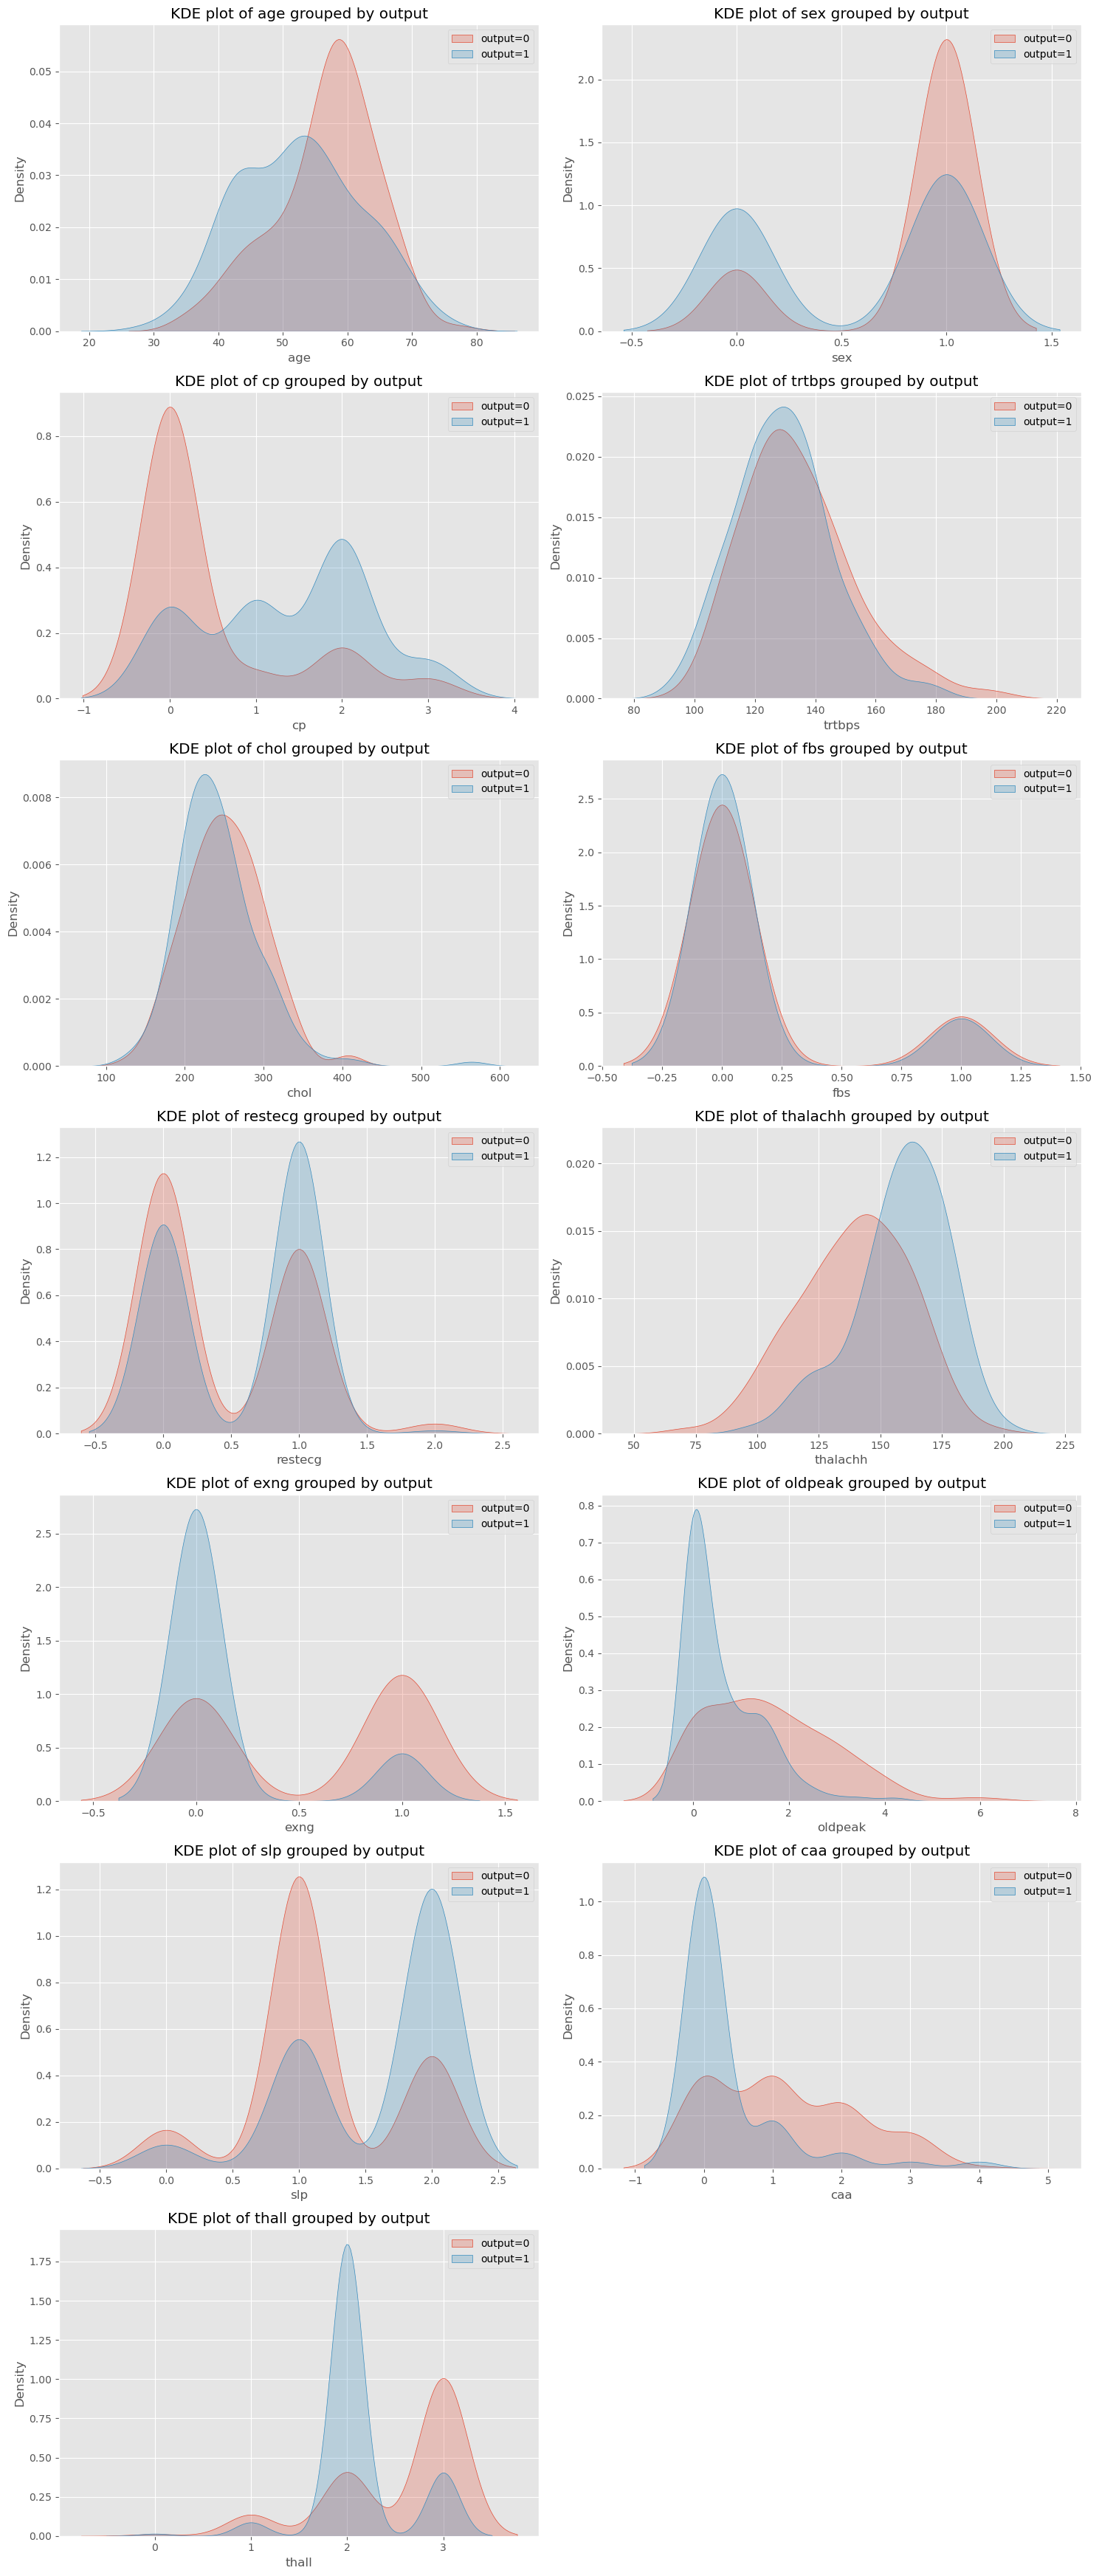

In [22]:
num_columns = len(df.columns) - 1  
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(15, 5*num_rows))


for i, column in enumerate(df.columns.drop('output')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['output'] == 0][column], label='output=0', fill=True)
    sns.kdeplot(data=df[df['output'] == 1][column], label='output=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by output')
    plt.legend()

plt.tight_layout()
plt.show()

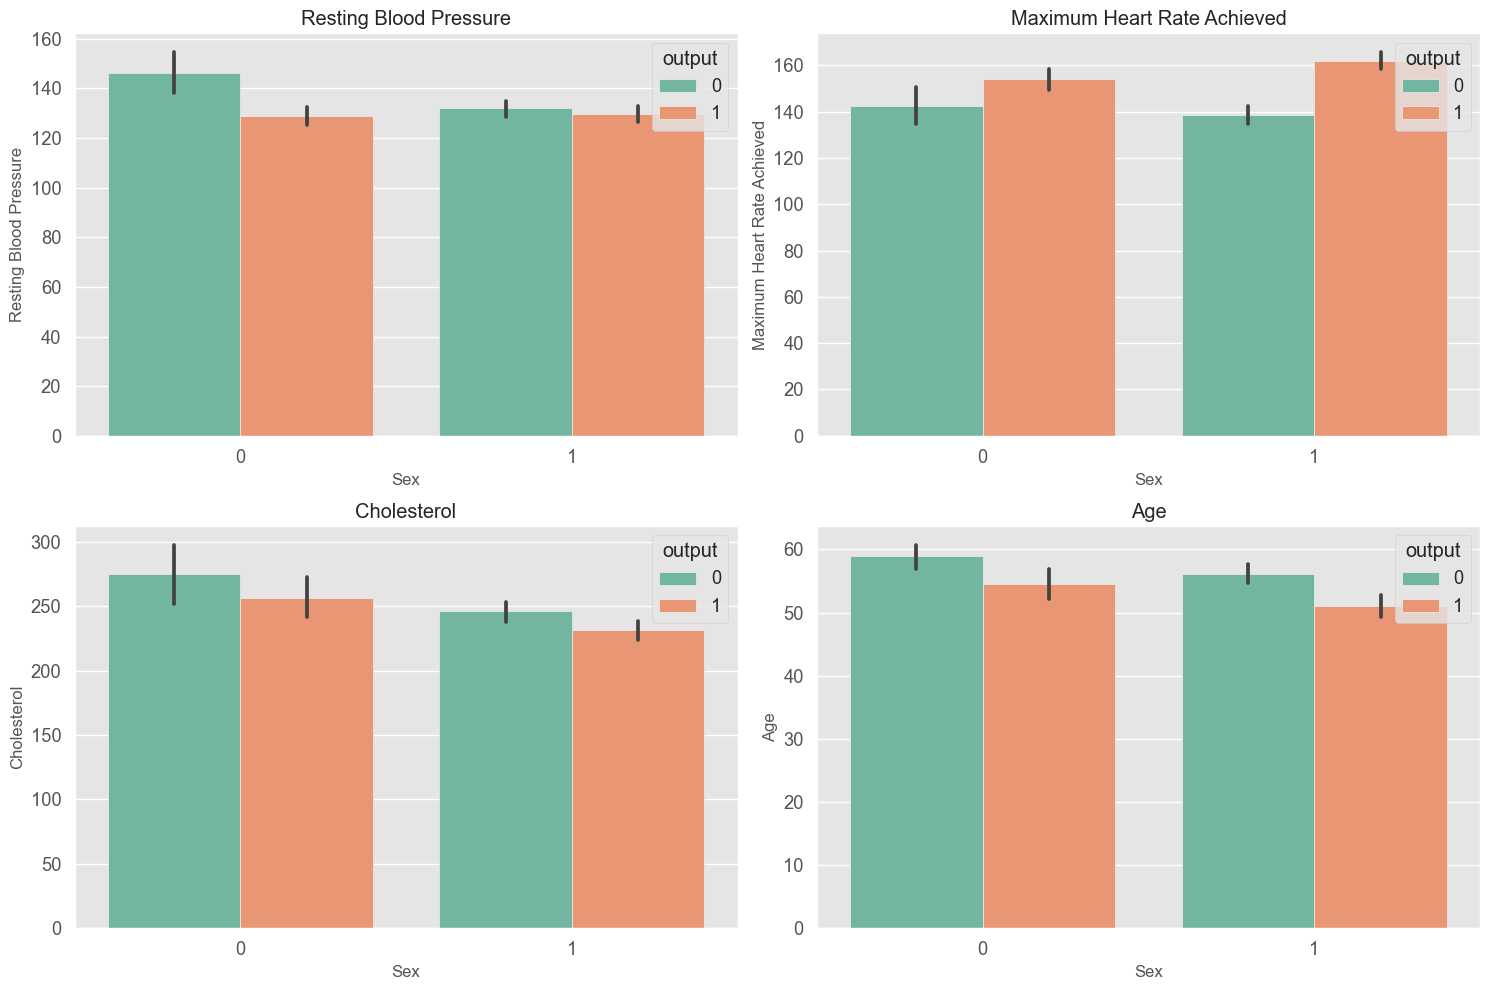

In [68]:
# Create a new figure with a specific size
plt.figure(figsize=(15, 10))

# Subplot 1: Resting Blood Pressure
plt.subplot(2, 2, 1)
plt.title("Resting Blood Pressure")
# Create a bar plot with 'sex' on the x-axis, 'trtbps' on the y-axis, and color-coded by 'output'
sns.barplot(x='sex', y='trtbps', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')

# Subplot 2: Maximum Heart Rate Achieved
plt.subplot(2, 2, 2)
plt.title("Maximum Heart Rate Achieved")
# Create a bar plot with 'sex' on the x-axis, 'thalachh' on the y-axis, and color-coded by 'output'
sns.barplot(x='sex', y='thalachh', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Maximum Heart Rate Achieved')

# Subplot 3: Cholesterol
plt.subplot(2, 2, 3)
plt.title("Cholesterol")
# Create a bar plot with 'sex' on the x-axis, 'chol' on the y-axis, and color-coded by 'output'
sns.barplot(x='sex', y='chol', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')

# Subplot 4: Age
plt.subplot(2, 2, 4)
plt.title("Age")
# Create a bar plot with 'sex' on the x-axis, 'age' on the y-axis, and color-coded by 'output'
sns.barplot(x='sex', y='age', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Age')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

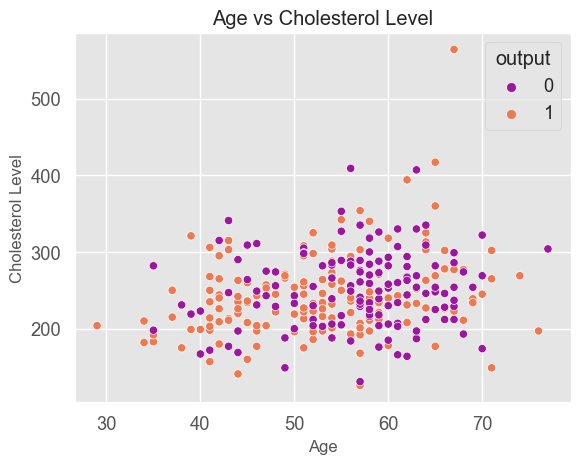

In [69]:
# Scatter plot depicting Age vs Cholesterol Level
sns.scatterplot(x='age', y='chol', hue='output', data=df, palette='plasma')
# Set the title of the plot
plt.title('Age vs Cholesterol Level')
# Set the label for the x-axis
plt.xlabel('Age')
# Set the label for the y-axis
plt.ylabel('Cholesterol Level')
# Display the plot
plt.show()

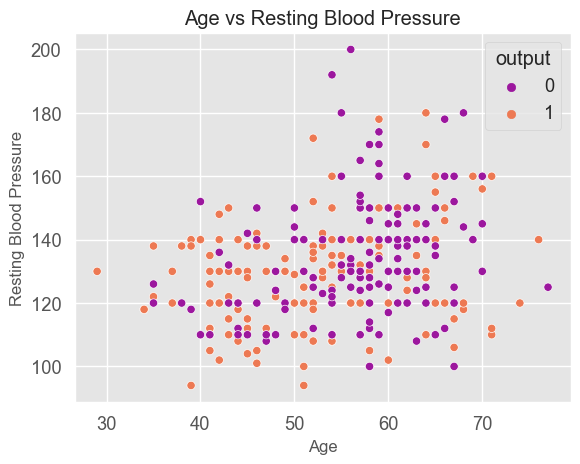

In [70]:
# Scatter plot depicting Age vs Resting Blood Pressure
sns.scatterplot(x='age', y='trtbps', hue='output', data=df, palette='plasma')
# Set the title of the plot
plt.title('Age vs Resting Blood Pressure')
# Set the label for the x-axis
plt.xlabel('Age')
# Set the label for the y-axis
plt.ylabel('Resting Blood Pressure')
# Display the plot
plt.show()

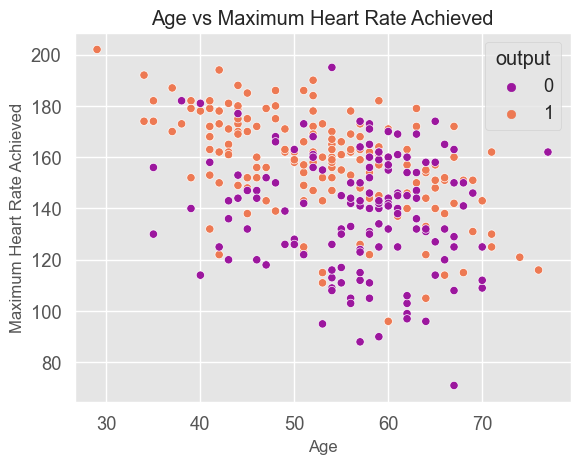

In [71]:
# Scatter plot depicting Age vs Maximum Heart Rate Achieved
sns.scatterplot(x='age', y='thalachh', hue='output', data=df, palette='plasma')
# Set the title of the plot
plt.title('Age vs Maximum Heart Rate Achieved')
# Set the label for the x-axis
plt.xlabel('Age')
# Set the label for the y-axis
plt.ylabel('Maximum Heart Rate Achieved')
# Display the plot
plt.show()

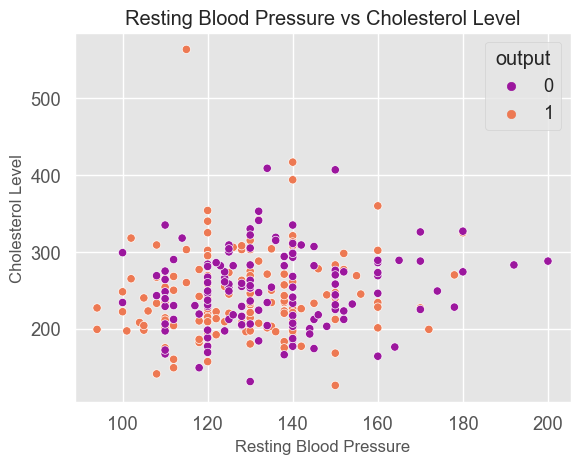

In [72]:
# Scatter plot depicting Resting Blood Pressure vs Cholesterol Level
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df, palette='plasma')
# Set the title of the plot
plt.title('Resting Blood Pressure vs Cholesterol Level')
# Set the label for the x-axis
plt.xlabel('Resting Blood Pressure')
# Set the label for the y-axis
plt.ylabel('Cholesterol Level')
# Display the plot
plt.show()

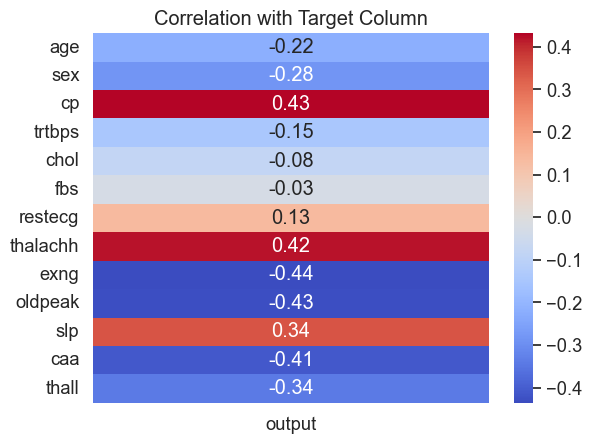

In [73]:
# Calculate the correlation matrix for all columns in the DataFrame
corr = df.corr()

# Extract the correlation of each feature with the target column 'output'
target_corr = corr['output'].drop('output')

# Set the font scale, style, and color palette for the heatmap
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")

# Create a heatmap to visualize the correlation with the target column
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')

# Set the title of the heatmap
plt.title('Correlation with Target Column')

# Display the heatmap
plt.show()

In [74]:
# Create a copy of the original DataFrame for further processing
df1 = df.copy()

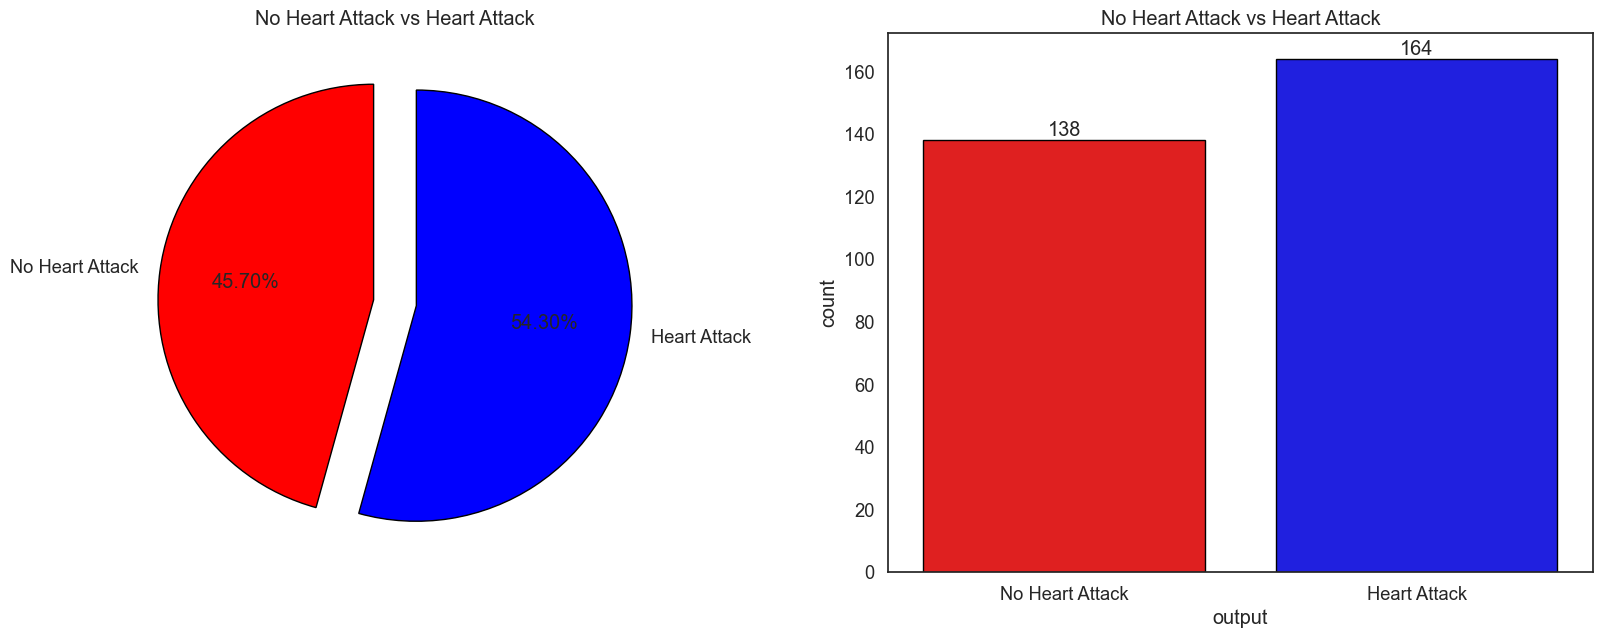

In [75]:
# Define colors for the pie chart
palette = ["#FF0000", "#0000FF"]

# Count the occurrences of each target class
Diabetes_count = df1['output'].value_counts()[1]
No_Diabetes_count = df1['output'].value_counts()[0]

# Calculate the percentage of each class
total_count = len(df)
diabetes_percentage = (Diabetes_count / total_count) * 100
no_diabetes_percentage = (No_Diabetes_count / total_count) * 100

# Create values and labels for the pie chart
pie_values = [no_diabetes_percentage, diabetes_percentage]
labels = ['No Heart Attack', 'Heart Attack']

# Create a pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# First subplot - Pie chart
plt.subplot(1, 2, 1)
plt.pie(pie_values, labels=labels,
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=palette,  # Use the defined colors
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('No Heart Attack vs Heart Attack')

# Second subplot - Countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df,
                x='output',
                palette=palette,  # Use the defined colors
                edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticks([0, 1])  # Set ticks manually to match the categories
ax.set_xticklabels(labels)

plt.title('No Heart Attack vs Heart Attack')
plt.show()

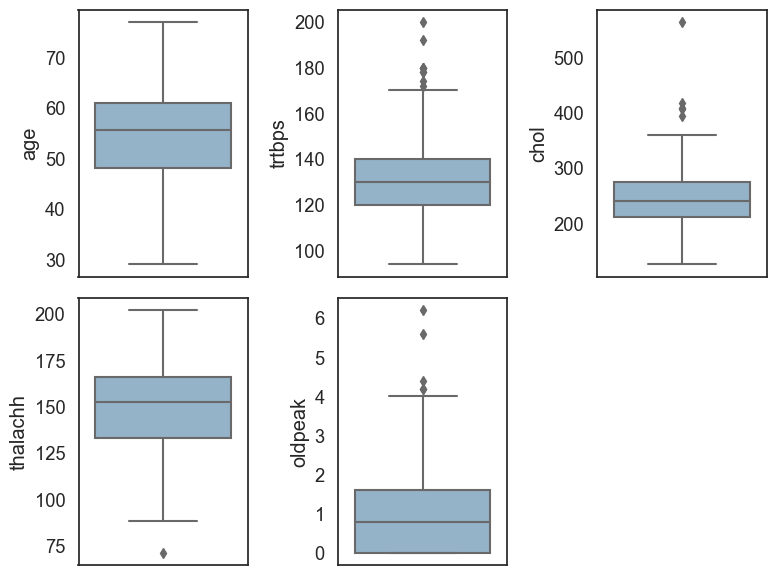

In [76]:
# Define numerical columns for box plots
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Create a box plot for each numerical column
plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df1[column])

# Adjust layout for better visualization
plt.tight_layout()

In [77]:
# Define features to be scaled using RobustScaler
features_to_scale_robust = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Initialize RobustScaler
robust_scaler = RobustScaler()

# Scale selected features using RobustScaler
df1[features_to_scale_robust] = robust_scaler.fit_transform(df1[features_to_scale_robust])

# Function to count outliers in a series
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Count outliers for each feature and print the results
for feature in features_to_scale_robust:
    num_outliers = count_outliers(df1[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in age: 0
Number of outliers in trtbps: 9
Number of outliers in chol: 5
Number of outliers in thalachh: 1
Number of outliers in oldpeak: 5


In [78]:
# Split the dataset into features (X) and target variable (y)
X = df1.drop('output', axis=1)
y = df1['output']

In [79]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Display descriptive statistics of the resampled data
X_resampled.describe().T.style.background_gradient(axis=0, cmap='Set3')

,count,mean,std,min,25%,50%,75%,max
age,328.000000,0.535183,0.186996,0.000000,0.395833,0.562500,0.666667,1.000000
sex,328.000000,0.689024,0.463600,0.000000,0.000000,1.000000,1.000000,1.000000
cp,328.000000,0.302602,0.339148,0.000000,0.000000,0.219233,0.666667,1.000000
trtbps,328.000000,0.357559,0.163659,0.000000,0.245283,0.339623,0.433962,1.000000
chol,328.000000,0.275445,0.116886,0.000000,0.196347,0.263699,0.340183,1.000000
fbs,328.000000,0.161065,0.367565,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,328.000000,0.252546,0.261567,0.000000,0.000000,0.011613,0.500000,1.000000
thalachh,328.000000,0.592730,0.174013,0.000000,0.465649,0.618321,0.717333,1.000000
exng,328.000000,0.338415,0.473893,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,328.000000,0.173812,0.189472,0.000000,0.000000,0.129032,0.290323,1.000000


In [80]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [81]:
# Model 1: Logistic Regression
m1 = 'Logistic Regression'

# Instantiate Logistic Regression model
lr = LogisticRegression()

# Train the model
model = lr.fit(X_train, y_train)

# Predict on the test set
lr_predict = lr.predict(X_test)

# Evaluate the model
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

# Display results
print("Confusion Matrix:")
print(lr_conf_matrix)
print("\n")
print(f"Accuracy of {m1}: {lr_acc_score*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, lr_predict))

Confusion Matrix:
[[25  7]
 [ 6 28]]


Accuracy of Logistic Regression: 80.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.80      0.82      0.81        34

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66



In [82]:
# Model 2: Naive Bayes
m2 = 'Naive Bayes'

# Instantiate Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Predict on the test set
nbpred = nb.predict(X_test)

# Evaluate the model
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

# Display results
print("Confusion Matrix:")
print(nb_conf_matrix)
print("\n")
print(f"Accuracy of {m2} model: {nb_acc_score*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, nbpred))

Confusion Matrix:
[[24  8]
 [ 5 29]]


Accuracy of Naive Bayes model: 80.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.78      0.85      0.82        34

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66



In [83]:
# Model 3: Random Forest Classifier
m3 = 'Random Forest Classifier'

# Instantiate Random Forest model
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
rf_predicted = rf.predict(X_test)

# Evaluate the model
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

# Display results
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\n")
print(f"Accuracy of {m3}: {rf_acc_score*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, rf_predicted))

Confusion Matrix:
[[27  5]
 [ 4 30]]


Accuracy of Random Forest Classifier: 86.36%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.86      0.88      0.87        34

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



In [84]:
# Model 4: Extreme Gradient Boost
m4 = 'Extreme Gradient Boost'

# Instantiate XGBoost model
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52,
                    colsample_bytree=0.6, seed=27, reg_lambda=2, booster='dart',
                    colsample_bylevel=0.6, colsample_bynode=0.5)

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
xgb_predicted = xgb.predict(X_test)

# Evaluate the model
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

# Display results
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\n")
print(f"Accuracy of {m4}: {xgb_acc_score*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, xgb_predicted))

Confusion Matrix:
[[24  8]
 [ 4 30]]


Accuracy of Extreme Gradient Boost: 81.82%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.79      0.88      0.83        34

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



In [85]:
# Model 5: K-Neighbors Classifier
m5 = 'K-Neighbors Classifier'

# Instantiate KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
knn_predicted = knn.predict(X_test)

# Evaluate the model
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

# Display results
print("Confusion Matrix:")
print(knn_conf_matrix)
print("\n")
print(f"Accuracy of {m5}: {knn_acc_score*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, knn_predicted))

Confusion Matrix:
[[29  3]
 [10 24]]


Accuracy of K-Neighbors Classifier: 80.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.89      0.71      0.79        34

    accuracy                           0.80        66
   macro avg       0.82      0.81      0.80        66
weighted avg       0.82      0.80      0.80        66



In [86]:
# Model 6: Decision Tree Classifier
m6 = 'Decision Tree Classifier'

# Instantiate Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
dt_predicted = dt.predict(X_test)

# Evaluate the model
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Display results
print("Confusion Matrix:")
print(dt_conf_matrix)
print("\n")
print(f"Accuracy of {m6}: {dt_acc_score*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, dt_predicted))

Confusion Matrix:
[[27  5]
 [10 24]]


Accuracy of Decision Tree Classifier: 77.27%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.83      0.71      0.76        34

    accuracy                           0.77        66
   macro avg       0.78      0.77      0.77        66
weighted avg       0.78      0.77      0.77        66



In [87]:
# Model 7: Support Vector Classifier
m7 = 'Support Vector Classifier'

# Instantiate Support Vector Classifier model
svc = SVC(kernel='rbf', C=2)

# Train the model
svc.fit(X_train, y_train)

# Predict on the test set
svc_predicted = svc.predict(X_test)

# Evaluate the model
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

# Display results
print("Confusion Matrix:")
print(svc_conf_matrix)
print("\n")
print(f"Accuracy of {m7}: {svc_acc_score*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, svc_predicted))

Confusion Matrix:
[[27  5]
 [ 6 28]]


Accuracy of Support Vector Classifier: 83.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.85      0.82      0.84        34

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66



In [88]:
# Model Evaluation DataFrame
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest',
                                  'Extreme Gradient Boost', 'K-Nearest Neighbour', 'Decision Tree',
                                  'Support Vector Machine'],
                        'Accuracy': [lr_acc_score, nb_acc_score, rf_acc_score, xgb_acc_score,
                                     knn_acc_score, dt_acc_score, svc_acc_score]})

# Display the Model Evaluation DataFrame
model_ev

,Model,Accuracy
0,Logistic Regression,0.803030
1,Naive Bayes,0.803030
2,Random Forest,0.863636
3,Extreme Gradient Boost,0.818182
4,K-Nearest Neighbour,0.803030
5,Decision Tree,0.772727
6,Support Vector Machine,0.833333


In [89]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with RandomForestClassifier and the hyperparameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best RandomForestClassifier model from the grid search
rf_best = grid_search.best_estimator_

# Make predictions on the test set
y_pred = rf_best.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



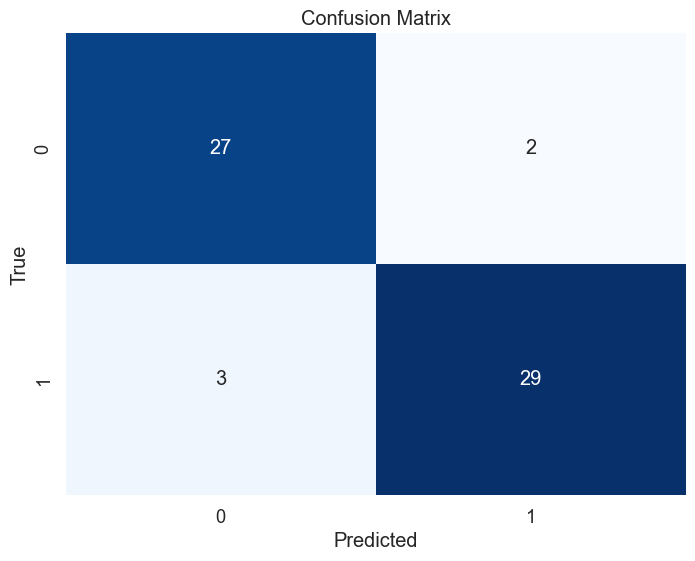

In [53]:
y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

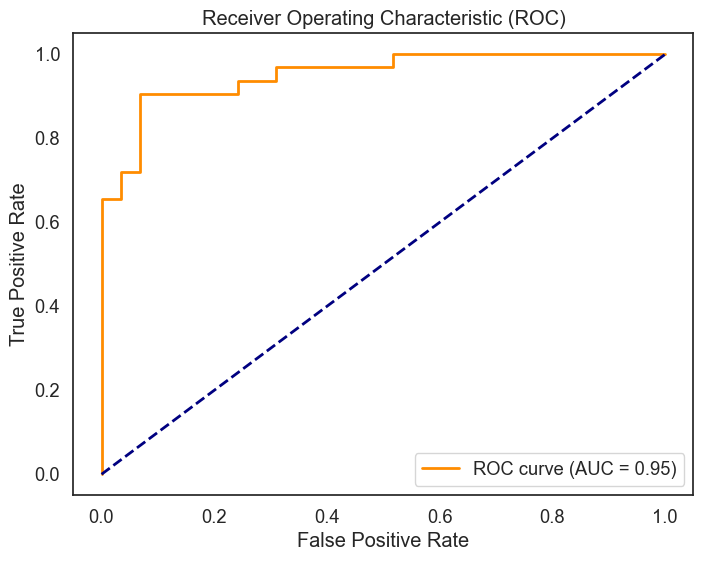

In [91]:
# Make probabilistic predictions on the test set
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and area under the curve (AUC) for the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

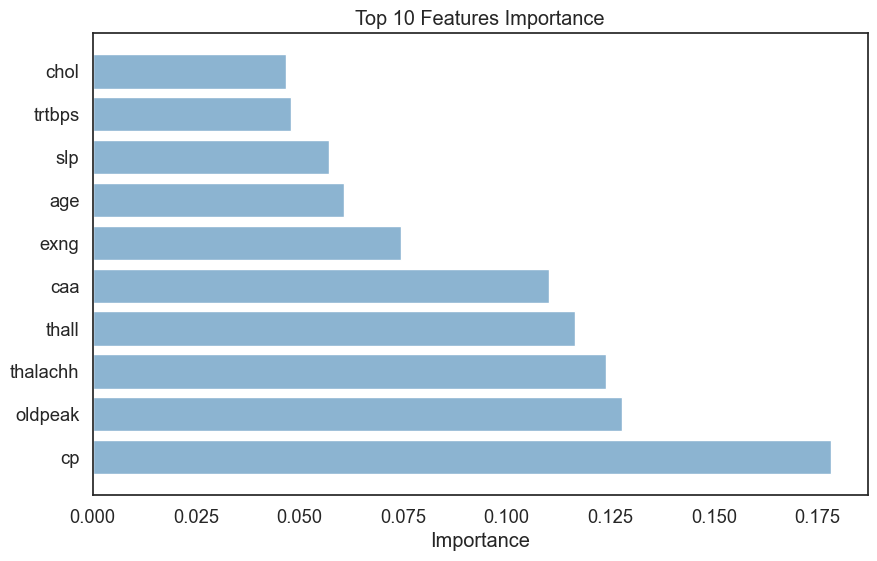

Feature Importance:
     Feature  Importance
2         cp    0.178243
9    oldpeak    0.127916
7   thalachh    0.123869
12     thall    0.116385
11       caa    0.110148


In [92]:
# Fit the RandomForestClassifier on the entire dataset
rf_best.fit(X, y)

# Extract feature importances
feature_importances = rf_best.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features based on importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Features Importance')
plt.show()

# Display the feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df.head())

## Project Write-Up: Sentiment Analysis on Heart Disease Dataset

## Overview
This Jupyter notebook demonstrates a comprehensive analysis of a heart disease dataset using Python and popular libraries such as Pandas, Matplotlib, Seaborn, and Scikit-learn. The project is structured into several sections, each focusing on specific aspects of the data analysis process.

## Data Loading and Exploration
The project begins by loading the heart disease dataset ('heart.csv') into a Pandas DataFrame. A series of exploratory data analysis (EDA) tasks are performed to understand the dataset's structure, data types, and basic statistics. Visualizations, including missing value analysis, duplicate removal, and summary statistics, provide valuable insights into the dataset's characteristics.

## Data Visualization
The notebook extensively employs Matplotlib and Seaborn for data visualization. Visualizations include histograms, bar plots, scatter plots, and heatmaps, highlighting patterns and relationships among various features. Specific attention is given to key factors such as age, blood pressure, cholesterol, and their impact on the likelihood of heart disease.

## Data Preprocessing
Data preprocessing steps involve handling outliers, scaling numerical features, and addressing class imbalance using the Synthetic Minority Over-sampling Technique (SMOTE). The notebook walks through the implementation of robust scaling, outlier detection, and SMOTE techniques to enhance the quality of the dataset for machine learning.

## Model Development
Several machine learning models are applied, including Logistic Regression, Naive Bayes, Random Forest, Extreme Gradient Boosting, K-Neighbors Classifier, Decision Tree, and Support Vector Classifier. Each model is trained, tested, and evaluated using accuracy scores, confusion matrices, and classification reports.

## Hyperparameter Tuning
The Random Forest model undergoes hyperparameter tuning using GridSearchCV to find the optimal combination of parameters. The tuned model is then evaluated, and its classification report is presented.

## Model Evaluation
The performance of each model is evaluated in terms of accuracy, precision, recall, and F1-score. The results are summarized in a DataFrame, providing a comparative analysis of model performance.

## ROC Curve
A Receiver Operating Characteristic (ROC) curve is plotted for the tuned Random Forest model, displaying the trade-off between true positive rate and false positive rate. The area under the curve (AUC) is calculated to assess the model's discriminatory power.

## Feature Importance
The importance of features in predicting heart disease is analyzed using the Random Forest model. A horizontal bar chart visualizes the top 10 features ranked by importance.

## Conclusion
In conclusion, this sentiment analysis project serves as a comprehensive guide to exploratory data analysis, preprocessing, and machine learning modeling on a heart disease dataset. The detailed code, comments, and visualizations provide a clear understanding of each step, making the notebook accessible for both beginners and experienced data scientists.